# YouTube, desktop, QUIC

In [1]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

**Подгружаем таблицу с нашими данными**

In [2]:
data = pd.read_csv('data_QUIC.csv')
data

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
0,0,1,1.543082e+07,8.344470e+05,2160
1,1,2,1.525832e+07,8.734145e+05,2160
2,2,3,1.028144e+07,1.348282e+06,2160
3,3,4,1.131292e+07,1.768927e+06,2160
4,4,5,5.439688e+06,7.407129e+05,2160
...,...,...,...,...,...
145,145,21,1.722118e+06,3.582496e+04,360
146,146,22,1.422481e+06,3.824372e+04,360
147,147,23,1.003604e+06,2.928689e+04,360
148,148,24,1.990373e+06,3.742236e+04,360


In [3]:
data = data.drop(columns=['Unnamed: 0', 'Video_number'])
data

,Density_burst,Density_throttling,Quality
0,1.543082e+07,8.344470e+05,2160
1,1.525832e+07,8.734145e+05,2160
2,1.028144e+07,1.348282e+06,2160
3,1.131292e+07,1.768927e+06,2160
4,5.439688e+06,7.407129e+05,2160
...,...,...,...
145,1.722118e+06,3.582496e+04,360
146,1.422481e+06,3.824372e+04,360
147,1.003604e+06,2.928689e+04,360
148,1.990373e+06,3.742236e+04,360


**Посмотрим на данные наглядно**

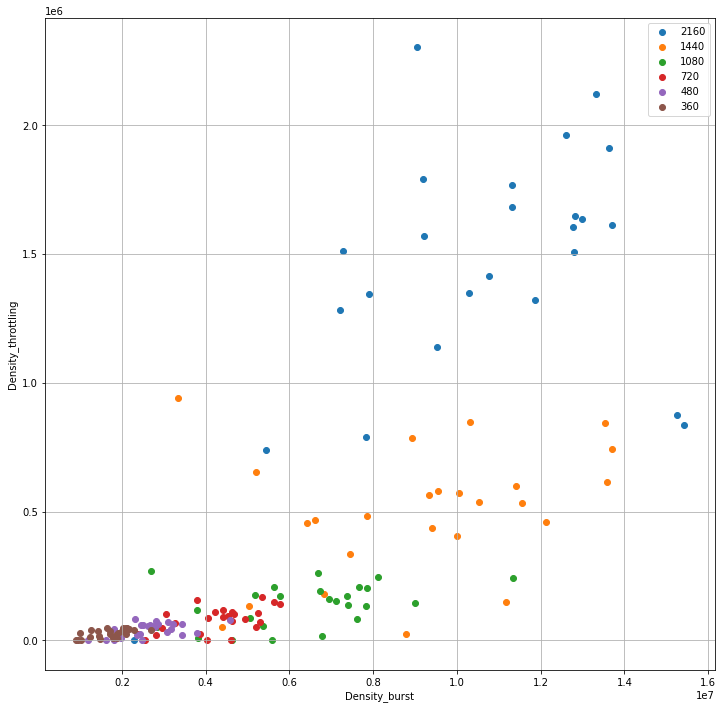

In [4]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

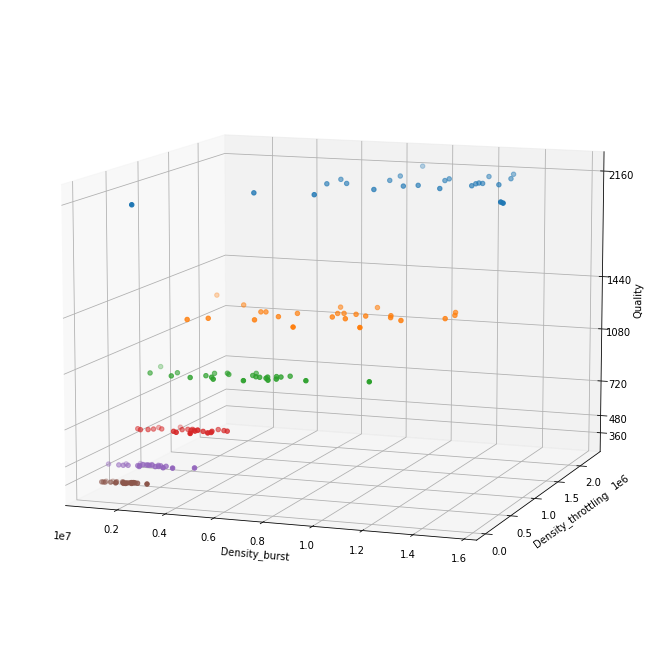

In [5]:
fig_3d = plt.figure(figsize=(12, 12))
ax = fig_3d.add_subplot(projection='3d')

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    z = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
            z.append(quality)
    ax.scatter(x, y, z)
    
ax.set_xlabel('Density_burst')
ax.set_ylabel('Density_throttling')
ax.set_zlabel('Quality')

ax.view_init(10,-70)

ax.set_zticks([360, 480, 720, 1080, 1440, 2160])

plt.grid(True)

plt.show()

**Перемешаем строки**

In [6]:
data_shuffled = shuffle(data)
data_shuffled

,Density_burst,Density_throttling,Quality
53,6.771195e+06,1.868033e+04,1080
100,1.806642e+06,1.185588e+03,480
94,5.628830e+06,1.501666e+05,720
33,1.213104e+07,4.612992e+05,1440
138,2.177142e+06,4.580272e+04,360
...,...,...,...
147,1.003604e+06,2.928689e+04,360
115,2.862127e+06,6.292545e+04,480
5,9.222627e+06,1.570664e+06,2160
3,1.131292e+07,1.768927e+06,2160


**Нормализуем данные**

In [7]:
data_norm = data_shuffled.copy()

for column in ['Density_burst', 'Density_throttling']:
    data_norm[column] = ((data_norm[column] - data_norm[column].min()) /
                            (data_norm[column].max() - data_norm[column].min()))
    
data_norm

,Density_burst,Density_throttling,Quality
53,0.404430,0.007741,1080
100,0.062990,0.000137,480
94,0.325863,0.064891,720
33,0.773056,0.200124,1440
138,0.088472,0.019530,360
...,...,...,...
147,0.007761,0.012351,360
115,0.135582,0.026972,480
5,0.573028,0.682307,2160
3,0.716790,0.768481,2160


*По графикам можно понять отличие работы классификаторов с нормализацией и без*

**KNN**

In [8]:
X = data_norm[['Density_burst', 'Density_throttling']]
y = data_norm['Quality']

best_score = 0.0
i_best_score = 0
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())
    if (scores.mean() > best_score):
        best_score = scores.mean()
        i_best_score = i

print("\nЛучший резульат:\nn =", i_best_score, "\naccuracy =", best_score)

1   0.6133333333333333
2   0.7
3   0.6933333333333334
4   0.6933333333333334
5   0.7400000000000001
6   0.7266666666666667
7   0.72
8   0.72
9   0.7266666666666667
10  0.72
11  0.7066666666666668
12  0.72
13  0.7266666666666667
14  0.7266666666666667
15  0.72
16  0.7133333333333334
17  0.72
18  0.7066666666666667
19  0.7133333333333334
20  0.7133333333333334
21  0.72
22  0.7066666666666668
23  0.72
24  0.72
25  0.72
26  0.72
27  0.7333333333333334
28  0.7333333333333333
29  0.7333333333333332

Лучший резульат:
n = 5 
accuracy = 0.7400000000000001


**Support Vector Classification**

In [9]:
best_score = 0.0
best_kernel = ''
for i_kernel in (['linear', 'poly', 'rbf', 'sigmoid']):
    X_norm = data_norm[['Density_burst', 'Density_throttling']]
    y_norm = data_norm['Quality']
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=i_kernel))
    scores = cross_val_score(clf, X_norm, y_norm, cv=10, scoring = 'accuracy')
    n_spaces = 8 - len(i_kernel)
    print('kernel:', i_kernel, ' ' * n_spaces, 'scores_mean:', scores.mean())
    if (scores.mean() > best_score):
        best_score = scores.mean()
        best_kernel = i_kernel
        
print("\nЛучший резульат:\nkernel = ", best_kernel, "\naccuracy = ", best_score)

kernel: linear    scores_mean: 0.7266666666666666
kernel: poly      scores_mean: 0.5533333333333333
kernel: rbf       scores_mean: 0.7266666666666666
kernel: sigmoid   scores_mean: 0.38666666666666666

Лучший резульат:
kernel =  linear 
accuracy =  0.7266666666666666


**Пробуем CatBoost**

In [10]:
best_score = 0.0
best_params = []
for iter_param in ([100, 200, 500, 1000, 2000]):
    for cv_param in ([5, 10, 20]):
        for lr_param in ([0.05, 0.2, 0.5, 0.7, 1]):
            model = CatBoostClassifier(iterations=iter_param, learning_rate = lr_param, silent=True)
            scores = cross_val_score(model, X, y, cv=cv_param, scoring = 'accuracy')
            n_spaces_i = 1 - iter_param // 1000
            n_spaces_j = 1 - cv_param // 10
            n_spaces_k = 5 - len(str(lr_param))
            print('iterations:', iter_param, ' ' * n_spaces_i,
                  'cv:', cv_param, ' ' * n_spaces_j,
                  'learning_rate:', lr_param,' ' * n_spaces_k,
                  'scores_mean:', scores.mean())
            if (scores.mean() > best_score):
                best_score = scores.mean()
                best_params = [iter_param, cv_param, lr_param]

print("\nЛучший резульат:",
      "\niterations = ", best_params[0],
      "\ncv = ", best_params[1],
      "\nlearning_rate = ", best_params[2],
      "\naccuracy = ", best_score, sep = "")

iterations: 100   cv: 5   learning_rate: 0.05   scores_mean: 0.6933333333333332
iterations: 100   cv: 5   learning_rate: 0.2    scores_mean: 0.6533333333333333
iterations: 100   cv: 5   learning_rate: 0.5    scores_mean: 0.6333333333333333
iterations: 100   cv: 5   learning_rate: 0.7    scores_mean: 0.6533333333333333
iterations: 100   cv: 5   learning_rate: 1      scores_mean: 0.6266666666666666
iterations: 100   cv: 10  learning_rate: 0.05   scores_mean: 0.72
iterations: 100   cv: 10  learning_rate: 0.2    scores_mean: 0.6599999999999999
iterations: 100   cv: 10  learning_rate: 0.5    scores_mean: 0.6533333333333333
iterations: 100   cv: 10  learning_rate: 0.7    scores_mean: 0.6199999999999999
iterations: 100   cv: 10  learning_rate: 1      scores_mean: 0.62
iterations: 100   cv: 20  learning_rate: 0.05   scores_mean: 0.6982142857142857
iterations: 100   cv: 20  learning_rate: 0.2    scores_mean: 0.6758928571428571
iterations: 100   cv: 20  learning_rate: 0.5    scores_mean: 0.66517